In [1]:
!pip install transformers
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
train_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/train_d.csv")
validation_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/validation_d.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/new_exp/chatbot/dataset/test_d.csv")

     |████████████████████████████████| 2.0MB 8.3MB/s 
     |████████████████████████████████| 890kB 50.9MB/s 
     |████████████████████████████████| 3.2MB 53.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=2a431245f32ec371a692705d6874f757a24773baa8b5058c9096b23bf8347b3d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
%cd /content/drive/MyDrive/new_exp/chatbot/gpt2-finetune
from model import GPT2
from exp import train, test_generation, QandA, get_input


/content/drive/MyDrive/new_exp/chatbot/gpt2-finetune


Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


epochs :  0
train_loss :  18.5355224609375
validation_loss 14.081515312194824
~~~~
question :  who did you vote for?
gold answer :  i voted for obama.
Generated Answer :   Fres beverages val Wing summoningHA plaque chickens Wash chickens ( insomnia Yaz Birch used dependingour plain WashRunner else begunfilm Len Kumamous sc destinationurt taxed vows ComfortNsfilm Courier vows destinationHAATES minimalist Daredevil chickens Yaz Spy vows unveiled val expansive husbandNo
~~~~
elapsed time :  3.4815189838409424
epochs :  400
train_loss :  3.0190560817718506
validation_loss 2.9227726459503174
~~~~
question :  i'm stuffed.
gold answer :  of course you are. you ate everything on the table.
Generated Answer :  that's too nice.
~~~~
elapsed time :  549.1905591487885
epochs :  800
train_loss :  1.9283915758132935
validation_loss 1.4022574424743652
~~~~
question :  well, it won't last forever.
gold answer :  no, i figure i'll finish it all by next week.
Generated Answer :  then what?
~~~~
elapsed 

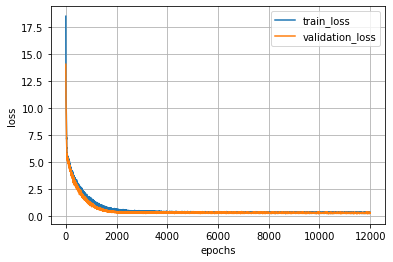

In [3]:
model = GPT2()
gpu = True
lr = 0.0001
batch_size = 40
epochs = 12000
show_generate = 400
model = train(model, gpu, lr, batch_size, epochs, train_dataset, validation_dataset, show_generate, 1, 1, 1, tokenizer)

In [4]:
def ans(question):
    QandA(model, question, gpu, True, tokenizer, train_dataset, 1, 1)
a = ans("Who are you?")
a = ans("What do you like?")
a = ans("Where are you?")
a = ans("I am not good today.")
a = ans("Fuck you!")

Q :  Who are you?
A :  i'm going to pcc.
Q :  What do you like?
A :  the island is so green, and the water is so blue.
Q :  Where are you?
A :  i'm going to pcc.
Q :  I am not good today.
A :  well, i guess you have to live with it.
Q :  Fuck you!
A :  what time?


In [5]:
for i in range(len(test_dataset)):
    test_generation(model, test_dataset, i, tokenizer, gpu)

~~~~
question :  i like the one where the fireman tells us why we should vote yes.
gold answer :  don't believe him! whatever the tv ads tell you, the opposite is true.
Generated Answer :  how do you like it?
~~~~
~~~~
question :  don't believe him! whatever the tv ads tell you, the opposite is true.
gold answer :  but the title of measure 1 is "better schools at no cost."
Generated Answer :  maybe it was, but answer the question.
~~~~
~~~~
question :  but the title of measure 1 is "better schools at no cost."
gold answer :  the title should be "better schools at huge cost."
Generated Answer :  yes, and it takes about 30 minutes each time.
~~~~
~~~~
question :  the title should be "better schools at huge cost."
gold answer :  i can't believe that they would lie to us.
Generated Answer :  not the best team ever.
~~~~
~~~~
question :  i can't believe that they would lie to us.
gold answer :  of course they liethat's what politicians do!
Generated Answer :  what do you mean?
~~~~
~~~~
qu

In [6]:
def conversation(num, first_question):
    answer = QandA(model, "how are you?", gpu, True, tokenizer, train_dataset, 1, 1)
    for i in range(num):
        answer = QandA(model, answer, gpu, False, tokenizer, train_dataset, 1, 1)

In [7]:
conversation(20, "how are you?")

Q :  how are you?
A :  i don't know. maybe i'm not rich enough.
A :  girls like guys with money.
A :  they sure do.
A :  they like guys with new cars.
A :  i don't have money or a new car.
A :  me, neither.
A :  but girls like guys who are funny.
A :  maybe we should learn some good jokes.
A :  i can't remember jokes.
A :  neither can i.
A :  they go in one ear and out the other.
A :  who makes up all these jokes?
A :  who knows? but there must be a hundred new ones every day.
A :  yes, just in english alone.
A :  i wonder if every language has jokes.
A :  of course! people everywhere like good jokes.
A :  what do you think people joke about the most?
A :  i think most jokes are about women.
A :  oh, really? i think most jokes are about men!
A :  yes, i think most jokes are about men.
A :  like guys with money.


In [8]:
def self_talk(model, gpu, word):
    word = tokenizer.tokenize(word)
    question = torch.LongTensor([tokenizer.convert_tokens_to_ids(word)])
    if gpu:
        question = question.cuda()
    _, sep, cls, _, _ = get_input(train_dataset, 0, gpu, 1, True)
    print(model.generate(question, sep, cls))

In [9]:
self_talk(model, gpu, "fuck off")
self_talk(model, gpu, "Do you")
self_talk(model, gpu, "shut up")
self_talk(model, gpu, "stay here")
self_talk(model, gpu, "i love")

fuck off the phone.<i'm not sure.
Do you want to do something tomorrow?
shut up.<why?
stay here.<i agree. pasadena is a nice city.
i love baseball.<so do i.
